In [23]:
import cv2
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import optimizers


In [24]:
IMG_SIZE = 256
train_dir = './Dataset/Covid19-dataset/train/'
test_dir = './Dataset/Covid19-dataset/test/'

X_train = []
y_train = []

for folder in os.scandir(train_dir):
    count = 0  # Initialize count to 0
    for entry in os.scandir(train_dir + folder.name):
        img = cv2.imread(train_dir + folder.name + '/' + entry.name, cv2.IMREAD_COLOR)  # Read image using OpenCV
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize image to specified size
        img = np.array(img, dtype='float32')  # Convert image to float32 type
        img = img/255  # Normalize pixel values to range [0, 1]

        X_train.append(img)  # Append image to training data

        count += 1  # Increment count for each image

        if folder.name == 'Covid':
            y_train.append(0)  # Assign class label 0 for 'Covid' 
        elif folder.name == 'Viral Pneumonia':
            y_train.append(1)  # Assign class label 1 for 'Viral Pneumonia' 
        else:
            y_train.append(2)  # Assign class label 2 for 'Normal'

    print(f"Folder: {folder.name}, Total Training Images: {count}")

X_train = np.array(X_train)  # Convert training data to numpy array
y_train = np.array(y_train)  # Convert class labels to numpy array

X_aug = []
y_aug = []

datagen = ImageDataGenerator(horizontal_flip=True)  # Data augmentation: horizontal flip

# Generate augmented data
augmented_data = datagen.flow(X_train, y_train, batch_size=32, shuffle=False)

# Concatenate the original training data with the augmented data
X_aug = np.concatenate([X_train, augmented_data[0][0]], axis=0)  # Concatenate augmented images along axis 0
y_aug = np.concatenate([y_train, augmented_data[0][1]], axis=0)  # Concatenate augmented class labels along axis 0


Folder: Covid, Total Training Images: 111
Folder: Normal, Total Training Images: 70
Folder: Viral Pneumonia, Total Training Images: 70


In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, shuffle=True, stratify=y_train, random_state=123)

model = tf.keras.Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])


opt = optimizers.Adam(learning_rate=0.0001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

checkpointer = ModelCheckpoint(filepath="main.h5", verbose=1, save_best_only=True)

history = model.fit(X_aug, y_aug, epochs=100, validation_data=(X_val, y_val), batch_size=32, shuffle=True, callbacks=[checkpointer])


Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 1.0067 - accuracy: 0.4841
Epoch 1: val_loss improved from inf to 1.02048, saving model to main.h5
9/9 [==============================] - 12s 1s/step - loss: 1.0067 - accuracy: 0.4841 - val_loss: 1.0205 - val_accuracy: 0.5000
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 0.8117 - accuracy: 0.6820
Epoch 2: val_loss improved from 1.02048 to 0.83514, saving model to main.h5
9/9 [==============================] - 12s 1s/step - loss: 0.8117 - accuracy: 0.6820 - val_loss: 0.8351 - val_accuracy: 0.6429
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 0.5734 - accuracy: 0.7703
Epoch 3: val_loss improved from 0.83514 to 0.63651, saving model to main.h5
9/9 [==============================] - 11s 1s/step - loss: 0.5734 - accuracy: 0.7703 - val_loss: 0.6365 - val_accuracy: 0.7857
Epoch 4/100
9/9 [==============================] - ETA: 0s - loss: 0.4951 - accuracy: 0.8057
Epoch 4: val_loss impro

9/9 [==============================] - 11s 1s/step - loss: 0.0925 - accuracy: 0.9611 - val_loss: 0.0696 - val_accuracy: 1.0000
Epoch 31/100
9/9 [==============================] - ETA: 0s - loss: 0.0939 - accuracy: 0.9505
Epoch 31: val_loss did not improve from 0.06960
9/9 [==============================] - 11s 1s/step - loss: 0.0939 - accuracy: 0.9505 - val_loss: 0.0750 - val_accuracy: 1.0000
Epoch 32/100
9/9 [==============================] - ETA: 0s - loss: 0.0683 - accuracy: 0.9753
Epoch 32: val_loss did not improve from 0.06960
9/9 [==============================] - 11s 1s/step - loss: 0.0683 - accuracy: 0.9753 - val_loss: 0.0942 - val_accuracy: 0.9286
Epoch 33/100
9/9 [==============================] - ETA: 0s - loss: 0.0710 - accuracy: 0.9823
Epoch 33: val_loss did not improve from 0.06960
9/9 [==============================] - 11s 1s/step - loss: 0.0710 - accuracy: 0.9823 - val_loss: 0.0756 - val_accuracy: 1.0000
Epoch 34/100
9/9 [==============================] - ETA: 0s - loss

Epoch 60/100
9/9 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 1.0000
Epoch 60: val_loss did not improve from 0.00831
9/9 [==============================] - 12s 1s/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 61/100
9/9 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9965
Epoch 61: val_loss did not improve from 0.00831
9/9 [==============================] - 14s 2s/step - loss: 0.0138 - accuracy: 0.9965 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 62/100
9/9 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 1.0000
Epoch 62: val_loss did not improve from 0.00831
9/9 [==============================] - 12s 1s/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 63/100
9/9 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9965
Epoch 63: val_loss did not improve from 0.00831
9/9 [==============================] - 13s 1s/step 

Epoch 90/100
9/9 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 90: val_loss improved from 0.00105 to 0.00087, saving model to main.h5
9/9 [==============================] - 12s 1s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 8.7265e-04 - val_accuracy: 1.0000
Epoch 91/100
9/9 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 91: val_loss improved from 0.00087 to 0.00073, saving model to main.h5
9/9 [==============================] - 12s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 7.3210e-04 - val_accuracy: 1.0000
Epoch 92/100
9/9 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 92: val_loss improved from 0.00073 to 0.00063, saving model to main.h5
9/9 [==============================] - 13s 1s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.2682e-04 - val_accuracy: 1.0000
Epoch 93/100
9/9 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9965


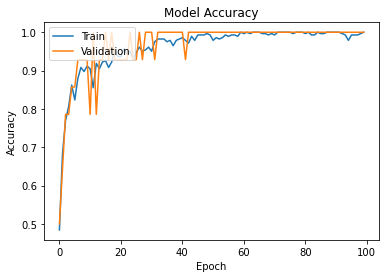

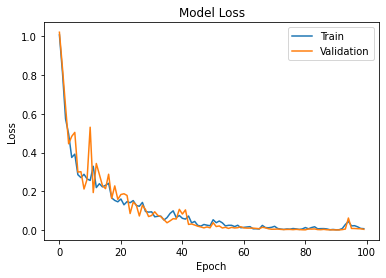

In [32]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [37]:
X_test = []
y_test = []

for folder in os.scandir(test_dir):
    for entry in os.scandir(test_dir + folder.name):
        img = cv2.imread(test_dir + folder.name + '/' + entry.name, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = np.array(img, dtype='float32')
        img = img / 255

        X_test.append(img)

        if folder.name == 'Covid':
            y_test.append(0)
        elif folder.name == 'Viral Pneumonia':
            y_test.append(1)
        else:
            y_test.append(2)

X_test = np.array(X_test)
y_test = np.array(y_test)

model.load_weights("main.h5")

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)


3/3 [==============================] - 0s 124ms/step - loss: 0.3077 - accuracy: 0.9242
Test Loss:  0.3076832890510559
Test Accuracy:  0.9242424368858337


In [38]:
from sklearn.metrics import classification_report
# Generate classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
class_names = ['Covid', 'Viral Pneumonia', 'Normal']  # Replace with your class names
report = classification_report(y_test, y_pred_classes, target_names=class_names)
print(report)

3/3 [==============================] - 1s 129ms/step
                 precision    recall  f1-score   support

          Covid       1.00      0.96      0.98        26
Viral Pneumonia       0.94      0.85      0.89        20
         Normal       0.83      0.95      0.88        20

       accuracy                           0.92        66
      macro avg       0.92      0.92      0.92        66
   weighted avg       0.93      0.92      0.93        66



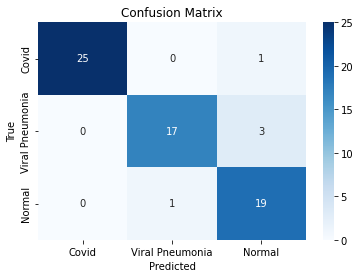

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

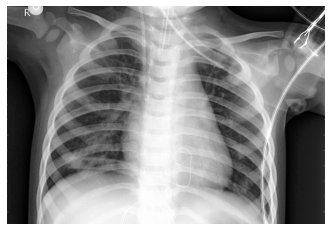

1/1 [==============================] - 0s 31ms/step
True Class: Viral Pneumonia
Predicted Class: Viral Pneumonia


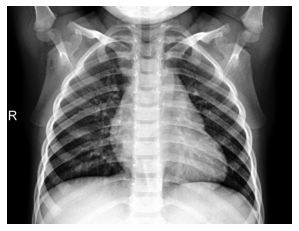

1/1 [==============================] - 0s 28ms/step
True Class: Normal
Predicted Class: Normal


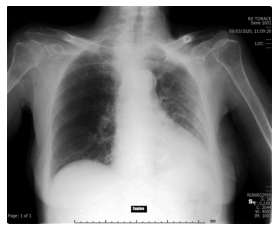

1/1 [==============================] - 0s 34ms/step
True Class: Covid
Predicted Class: Covid


In [46]:
import random

# test directory path and class names
class_names = ['Covid', 'Viral Pneumonia', 'Normal']

# Randomly display 3 images from test folders
for i in range(3):
    folder_name = random.choice(['Covid', 'Viral Pneumonia', 'Normal'])
    image_name = random.choice(os.listdir(test_dir + folder_name))
    image_path = os.path.join(test_dir, folder_name, image_name)

    # Load and display the selected image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Preprocess the image for prediction
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = np.array(image, dtype='float32')
    image = image / 255
    image = np.expand_dims(image, axis=0)

    # Make predictions using the model
    predictions = model.predict(image)
    predicted_class_index = np.argmax(predictions, axis=1)
    predicted_class_name = class_names[predicted_class_index[0]]

    # Print true class and predicted class
    print('True Class:', folder_name)
    print('Predicted Class:', predicted_class_name)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the tflite model to a file
with open('main.tflite', 'wb') as f:
    f.write(tflite_model)